# Aufgabenstellung

Für ein Heizsystem wird ein Glastubus verwendet. Durch eine regelbare Stromzufuhr wird Wärme generiert.
Je mehr Strom eingespeist wird, desto wärmer wird der Tubus.
Der Tubus gibt Wärme an seine Umgebung ab.
Die Menge der abgegebenen Wärme ist proportional zur Oberfläche des Tubus
und des Temperaturunterschiedes zwischen dem Tubus und der Umgebung.
Das Gleichgewicht des Temperatur-Verlustes und der Wärmeerzeugung lässt sich durch folgende Differentialgleichung ausdrücken:

\begin{align}
m\cdot c_P \frac{dT}{dt} &= Q \\
Q&=q_{in}-q_{out} \\
q_{in} &= q \\
q_{out} &=h_s \cdot A_s(T-T_a) 
\end{align}

Das Ziel ist es ein System zu entwerfen, welches die Temperatur des Glastubus regelt. Hierbei muss darauf geachtet werden, dass die Temperatur möglichst schnell den Zeilwert erreicht und das die Temperaturschwankungen auf ein Minimum reduziert werden.

# Aufgabe
In dieser Aufgabe soll die Differentialgleichung an einen Satz von Messdaten "gefittet" werden.
Hiebei sollen $m$ (Masse), sowie $A_s$ (Oberfläche), ermittelt werden.
Die Datei enthält Ergebnisse des Systems auf eine Sprungantwort. Die Werte der x-Achse sind die Zeitpunkte der Messungen in der Einheit Sekunde, startend bei 0 sek. Gemessen wurde die Temperaturdifferzenz zwischen dem Tubus und der Umgebung. Die Differenz wird in Kelvin angegenben und beträgt anfänglich 0 °K.

Die durch die Aufgabenstellung gegebene Differentialgleichung lässt sich explizit lösen:

$T(t)=k_1e^{-\frac{T_a h_s t}{c_p m}} + \frac{q}{T_a h_s}+T_a$

Die Wahl von $k_1$ nimmt einfluss auf den Startwert des Systems zum Zeitpunkt $t=0$. 


Da in der Aufgabenstellung nur die absolute Temperatur des Tubus gegeben ist sondern die Temperaturdifferenz zwischen Tubus und Umgebung, wird $T-T_a$ als die Variable des Systems betrachtet. Dadurch ändert sich die Differentialgleichung wie folgt:

$T(t)=k_1e^{-\frac{A_s h_s t}{c_p m}} + \frac{q}{A_s h_s}$

Die Formel zeigt, dass die zu erreichende Temperaturdifferenz nicht von der Aussentemperatur abhängt. Dies bedeutet, dass beliebige Temperaturen erreicht werden können, welche in einem gewissen Bereich über der Aussentemperatur liegen, dessen obere Grenze durch die maximale Leistung des Heizelements gebenen ist (bei festen Eigenschaften des Tubus).

Für die Lösung der Differentialgleichung wurde $k_1$ so gewählt, dass zum Zeitpunkt $t=0$ die Temperaturdifferenz bei $0$ liegt.

$k_1= -(\frac{q}{A_s h_s})$


Da es sich um eine Sprungsantwort handelt wird die Heizleisztung $q$ als konstant angesehen. Ebenfalls wird die Umgebungstemperatur $T_a$ als konstant angesehen. Das heißt, dass die Außentemperatur nicht durch den Tubus beeinflusst wird, was nur bedingt der Realität entspricht. Würde dies berücksichtig werden, so würde das Modell wesentlich komplexer werden.

In [12]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import control as c

In [13]:
#einlesen der Messdaten

my_data = np.genfromtxt('measurement_data.csv', delimiter=';')
xdata = my_data[:,0]
time = xdata
ydata = my_data[:,1]

In [14]:
#definition der konstanten

hs = 5 #heat transfer coefficient, W/(m^*K)
q = 2000 #input power, W
cp = 1078 #heat capacit of glas, J/(Kg*K)

In [15]:
#funktion zum fit entsprechend der einleitung (Lösung der DGL)

def func(t, m, As):
    return ((-(q/(As*hs)))*np.e**(-(As*hs*t)/(cp*m))+q/(As*hs))

In [16]:
#bestimmen der lösung durch fit
#die hier verwendeten startwerte wurden durch grobe abschätzungen ermittelt
popt, pcov = curve_fit(func, xdata, ydata, p0=(10, 1), bounds=([0.1, 0.1],[30, 10]))

In [17]:
#ausgabe der ergebnisse

m = popt[0]
As = popt[1]

residuals = ydata - func(xdata, m, As)
fres = sum(np.abs(residuals))
print('fres: %6.2f ' % fres)
print('m: %6.2f' % m)
print('As: %6.2f' % As)

fres: 3917.39 
m:  17.90
As:   1.27


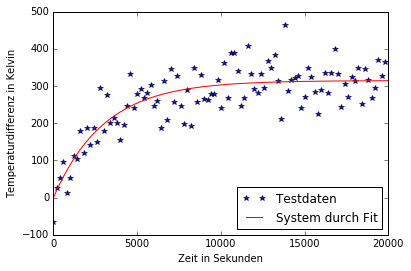

In [25]:
#plotten der ergebnisse

curvex = np.linspace(0,20000,10000)
curvey = func(curvex, m, As)

plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Temperaturdifferenz in Kelvin")
plt.legend(["Testdaten","System durch Fit"], loc=4)

In [ ]:
#finde grenzwert der gleichung durch optimierungsverfahren (umwandlung in minimierungsverfahren)
max_x = sc.optimize.fmin(lambda x: -func(x, m, As), 0)

# tatsächliche Werte mathematisch berechnen
m_math = (np.pi*0.11**2 - np.pi * 0.1**2) * 2500
print (m_math)
As_math = np.pi*0.2*2
print (As_math)

# Auswertung
Die rote Kurve beschreibt die Temperaturdifferenz zwischen Tubus und Umgebung in Abhängigkeit zur Zeit, welche durch die Lösung der Differentialgleichung bei den gegebenen Konstanten bestimmt wurde. Die Werte für $m$ und $A_s$ wurden anhand der Messdaten gefittet ($m=17.90$ und $A_s=1.27$). Es wurde davon ausgegengen, dass die Höhe des Eingangssignals der Sprungantwort 2 kW beträgt.
Die Messdaten sind als blaue Sterne markiert. Es ist zu erkennen, dass die ermittelte Kurve gegen einen Grenzwert konvergiert ( $max_{temp} = \tilde{}314.643$ ). Trotz starker Streuungen haben die Messdaten einen ähnlichen Verlauf und scheinen gegen den selben Wert zu laufen.

Der Tubus erwärmt sich solange, bis der Energieverlust zur Außenwelt ein Gleichgewicht mit der Leistung des Heizelementes bildet. Die Kurve weißt ein logarithmisches Wachstum auf. Anfangs ist die Temperaturzunahme maximal, läuft aber schnell in eine Sättigungsphase.

Mathemetisch Berechnung der Werte für Masse und Außenfläche:

$m = (\pi*r_{aussen}^2*h - \pi*r_{innen}^2*h)*Dichte = (1*\pi*0.11^2 - 1*\pi*0.1^2) *2500 = 16.4933$ 

$A_s = 2*\pi*r_{isolierung}*h =  2*\pi*0.2*1 = 1.2566$

Durch den Fit ermittelte Werte sind $17.90kg$ für die Masse und Aussenfläche $1.27m^2$ für die Aussenfläche. Der Wert für die Aussenfläche weicht um ca. 1.1% ab und die gefittete Masse um ca. 8.5%. Trotz der starken Streuung der Testdaten sind liegen die ermittelten Werte in einer akzeptablen Umgebung der mathematisch berechneten Werte.